# First we need to Analysis on Application Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing application_data.csv
df = pd.read_csv("G:/UpGrad/Credit EDA Case Study/application_data.csv")

#Structure of Data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Data Quality Check and Missing Values

#Calculating Totalof missing values per column
total = df.isnull().sum().sort_values(ascending = False)

#Calculating Percentage of missing values per column
percent_total = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

df1 = pd.concat([total, percent_total], axis=1, keys=['Total', 'Percent'])
df1.head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


# Data Cleaning

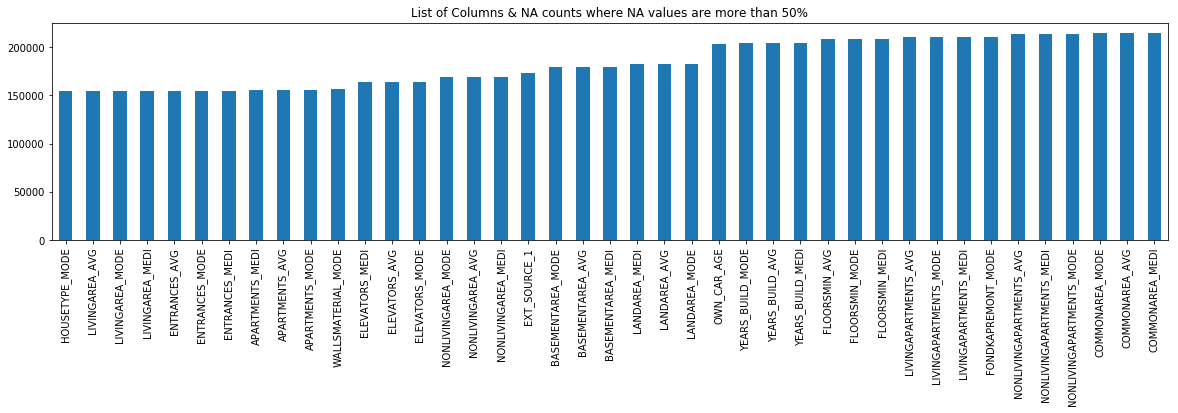

In [4]:
# Here I choose value 50% on which Data cleaning is done. 

# Plotting of Columns which has NA values more than 50%

total1 = df.isnull().sum().sort_values()
Missing_Coll = total1[total1.values > (0.5 * len(df))]
plt.figure(figsize=(20,4))
Missing_Coll.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

#### Report 1 : So from the above plot that there are 20+ columns in the application dataset where all the values are NA

In [5]:
#removing columns with 50% null values
df_app = df.loc[:,round(df.isnull().sum()/len(df)*100,2)<50]
df_app.shape

(307511, 81)

In [6]:
#Figuring outt rows with more than 50% null value

NA_row=df_app.transpose().isnull().sum()/len(df_app)*100
NA_row[NA_row.values >(0.5*len(df_app))]

Series([], dtype: float64)

In [7]:
# Dropping the unnecessary columns from the dataframe for further analysis.
df_Clean = df_app.iloc[:, 0:30]
df_Clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,1,1,0,1,1,0,Laborers,1.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,1,1,0,1,1,0,Core staff,2.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,1,1,1,1,1,0,Laborers,1.0,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,1,1,0,1,0,0,Laborers,2.0,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,1,1,0,1,0,0,Core staff,1.0,2


In [8]:
#get the type of the columns
column_list = list(df_Clean.columns)
for i in column_list:
    print (i, df_Clean[i].dtypes)

SK_ID_CURR int64
TARGET int64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64


# Check Unbalance Data

#### Report 2 : In the dataset Column TARGET is the categorical variable because it has two values 0 and 1 (i.e. Categorical variables represent types of data which may be divided into groups.)

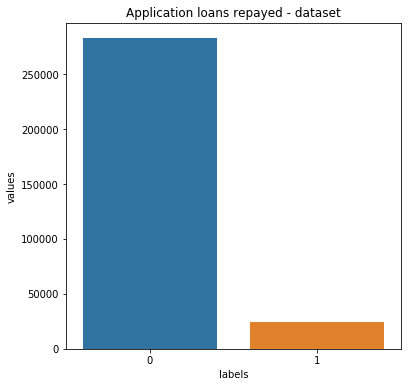

In [9]:
df2 = df_Clean["TARGET"].value_counts()
df2 = pd.DataFrame({'labels': df2.index, 'values': df2.values})
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df2)
locs, labels = plt.xticks()
plt.show()

#### Report 3 : So we can see from the above plot that there are less defaulter loan compared to that of loan repayed

# Univarite Analysis

In [10]:
df_Clean.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT'],
      dtype='object')

In [11]:
def plot_graph(column_name,r):
    plt.figure(figsize=(8,4))
    sns.countplot(x=column_name, data=df_Clean)
    plt.xlabel(column_name, fontsize=16)
    plt.ylabel('Number of Contract', fontsize=16)
    plt.title(column_name, fontsize=18)
    plt.xticks(rotation=r, fontsize=12)

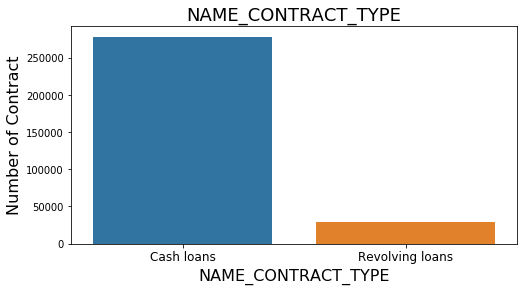

In [12]:
plot_graph('NAME_CONTRACT_TYPE',r=0)

#### Report 4 : Number of cash loan is high compare to Revolving loans.

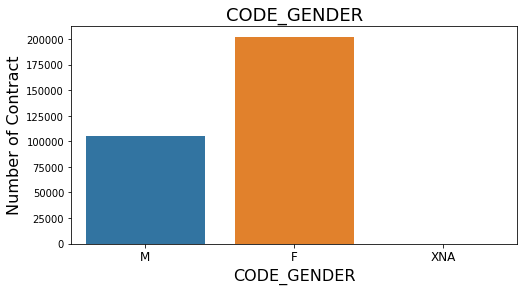

In [13]:
plot_graph('CODE_GENDER',r=0)

#### Report 5 : Number of female clients is much higher compare to that of male clients.

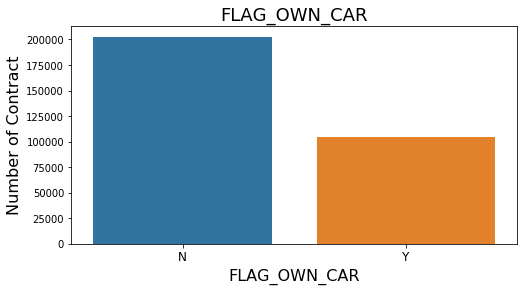

In [14]:
plot_graph('FLAG_OWN_CAR',r=0)

#### Report 6 : The clients that owns a car are almost a half of the ones that doesn't own one.

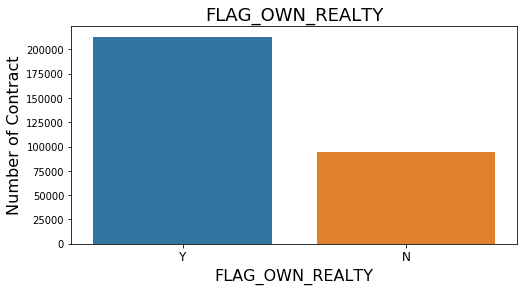

In [15]:
plot_graph('FLAG_OWN_REALTY',r=0)

#### Report 7 : The clients that owns real estate are more than double of the ones that doesn't own.

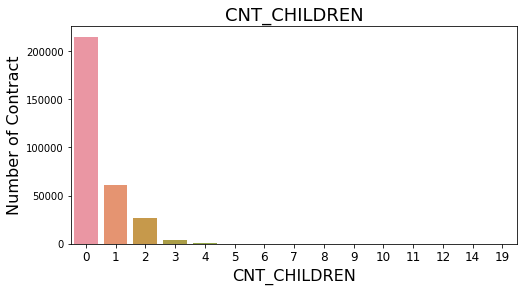

In [16]:
plot_graph('CNT_CHILDREN',r=0)

#### Report 8 : Most of the clients taking a loan have no children.

In [17]:
col_numeric = df_Clean.select_dtypes(exclude=[object])

##### Replace some numeric column values with the median-> 
##### Median: as these columns may contain outlier so choosing the median is the better option

In [18]:
col_numeric.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT'],
      dtype='object')

In [19]:
col_median =  col_numeric.columns

for c in col_median:
    df_Clean[c] = df_Clean[c].fillna(df_Clean[c].median())

In [20]:
# For checking in our dataset df_Clean we find two outliers which is :
# AMT_INCOME_TOTAL, CNT_FAM_MEMBERS

# For checking AMT_INCOME_TOTAL
val = pd.DataFrame(df_Clean['AMT_INCOME_TOTAL'].describe())
val.loc['count'] = val.loc['count'].astype(int)
val.iloc[1:] = val.iloc[1:].applymap('{:.4f}'.format)
print(val)

      AMT_INCOME_TOTAL
count           307511
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000


#### Report 9 : From the above data we can tell that the max value is much higher compare the 3rd quartile of the dataset.

In [21]:
#Removing outliers,Remove Outliers (values from 99 to 100%)
#For Column AMT_INCOME_TOTAL
q = df_Clean['AMT_INCOME_TOTAL'].quantile(0.995)
df_Clean = df_Clean[df_Clean['AMT_INCOME_TOTAL'] < q]
val1 = pd.DataFrame(df_Clean['AMT_INCOME_TOTAL'].describe())
val1.loc['count'] = val1.loc['count'].astype(int)
val1.iloc[1:] = val1.iloc[1:].applymap('{:.4f}'.format)
print(val1)

      AMT_INCOME_TOTAL
count           305943
mean       164764.1491
std         81644.2477
min         25650.0000
25%        112500.0000
50%        144000.0000
75%        202500.0000
max        625500.0000


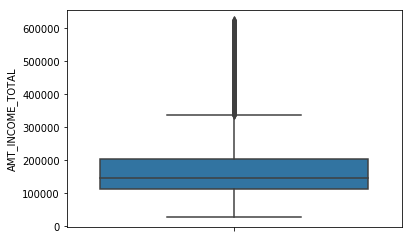

In [22]:
#Box Plot to determine the outlier
sns.boxplot(y=df_Clean['AMT_INCOME_TOTAL'])
plt.show()

In [23]:
# For checking CNT_FAM_MEMBERS
val_cnt = pd.DataFrame(df_Clean['CNT_FAM_MEMBERS'].describe())
val_cnt.loc['count'] = val_cnt.loc['count'].astype(int)
val_cnt.iloc[1:] = val_cnt.iloc[1:].applymap('{:.4f}'.format)
print(val_cnt)

      CNT_FAM_MEMBERS
count          305943
mean           2.1521
std            0.9103
min            1.0000
25%            2.0000
50%            2.0000
75%            3.0000
max           20.0000


#### Report 10 : From the above data we can tell that the max value is much higher compare the 3rd quartile of the dataset.

In [24]:
#Removing outliers,Remove Outliers (values from 99 to 100%)
#For Column CNT_FAM_MEMBERS
q1 = df_Clean['CNT_FAM_MEMBERS'].quantile(0.995)
df_Clean = df_Clean[df_Clean['CNT_FAM_MEMBERS'] < q1]
val1_cnt = pd.DataFrame(df_Clean['CNT_FAM_MEMBERS'].describe())
val1_cnt.loc['count'] = val1_cnt.loc['count'].astype(int)
val1_cnt.iloc[1:] = val1_cnt.iloc[1:].applymap('{:.4f}'.format)
print(val1_cnt)

      CNT_FAM_MEMBERS
count          301973
mean           2.1120
std            0.8422
min            1.0000
25%            2.0000
50%            2.0000
75%            3.0000
max            4.0000


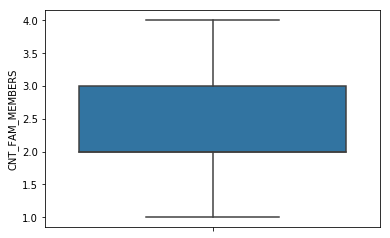

In [25]:
#Box Plot to determine the outlier
sns.boxplot(y=df_Clean['CNT_FAM_MEMBERS'])
plt.show()

### Creating Bins for Variable

In [26]:
bins = [0, 112500, 144000, 202500, 625500]
slot = ['0-112500', '112500-144000', '144000-202500', '202500-625500']
df_Clean['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df_Clean['AMT_INCOME_TOTAL'], bins, labels=slot)

In [27]:
bins1 = [0, 1, 2, 3, 4]
slot1= ['0-1', '1-2', '2-3', '3-4']
df_Clean['CNT_FAM_MEMBERS_RANGE'] = pd.cut(df_Clean['CNT_FAM_MEMBERS'], bins1, labels=slot1)

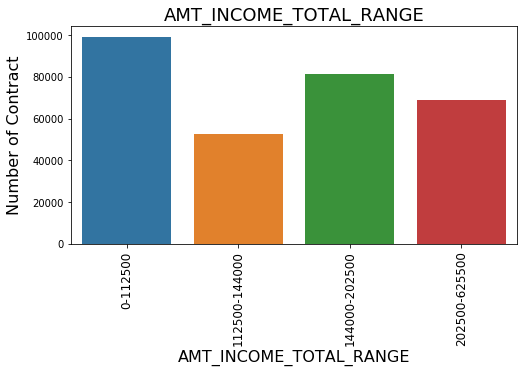

In [28]:
plot_graph('AMT_INCOME_TOTAL_RANGE',r=90)

#### Report 11 : Most number of clients belong from the group with salary range of 112500.

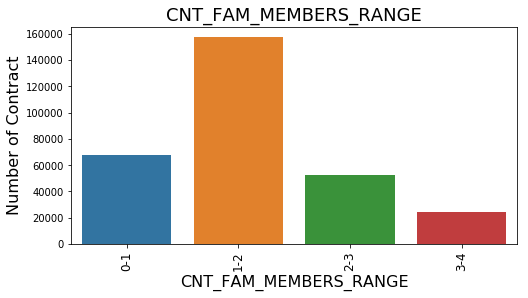

In [29]:
plot_graph('CNT_FAM_MEMBERS_RANGE',r=90)

#### Report 12 : Most number of clients belong from the group with Family Range between 1-2

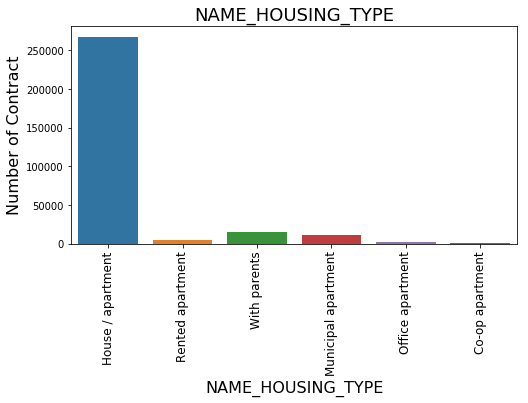

In [30]:
plot_graph('NAME_HOUSING_TYPE',90)

#### Report 13 : Person who lives in House/apartment tends to take more loan than anyother clients

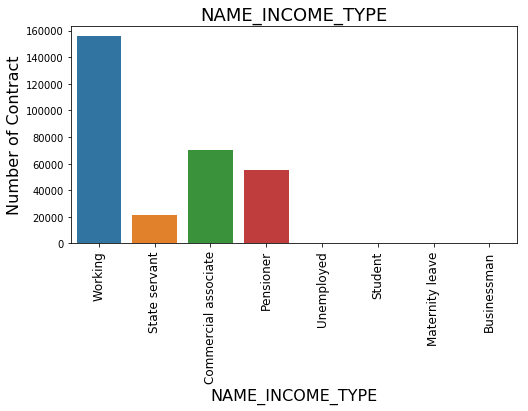

In [31]:
plot_graph('NAME_INCOME_TYPE',r=90)

#### Report 14 : Most of the people belongs to Working class follows by Commercial associate,Pensioner and State Servant.

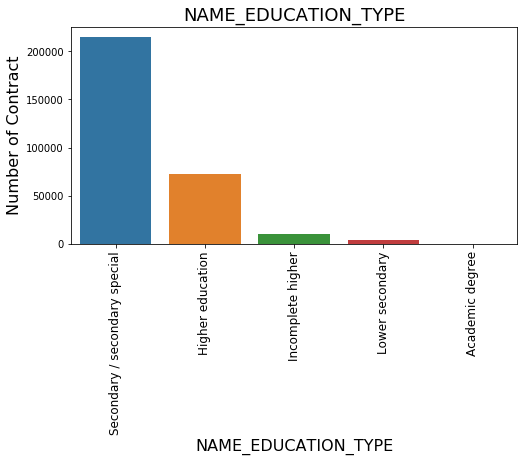

In [32]:
plot_graph('NAME_EDUCATION_TYPE',r=90)

#### Report 15 : Mpst of the people have Secondary / secondary special education, followed by people with Higher education. Only a very small number having an academic degree.

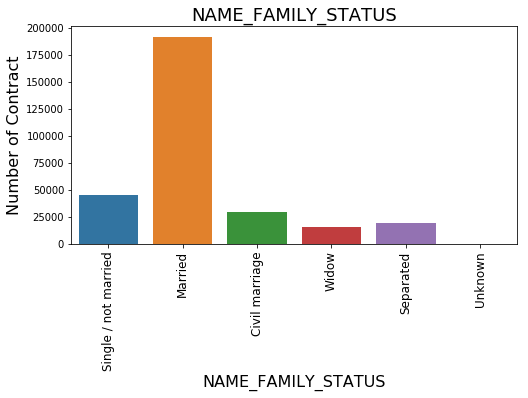

In [33]:
plot_graph('NAME_FAMILY_STATUS',r=90)

#### Report 16 : Most of the people belongs to Family_Status as Married or married people are tends to take loan.

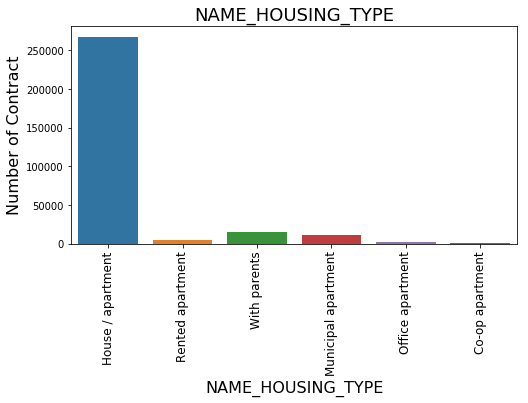

In [34]:
plot_graph('NAME_HOUSING_TYPE',90)

#### Report 17 : Person who lives in House/apartment tends to take more loan than anyother clients

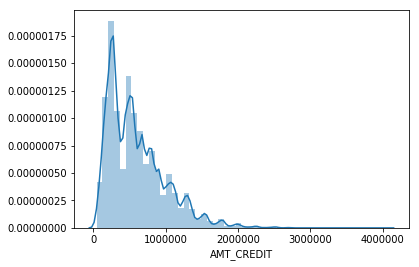

In [35]:
sns.distplot(df_Clean['AMT_CREDIT'])
plt.show()

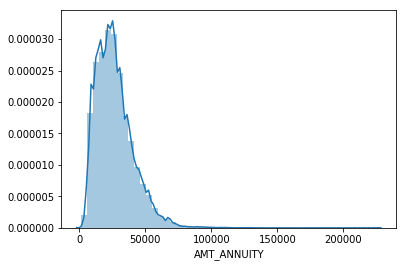

In [36]:
df_annuity=df_Clean['AMT_ANNUITY'].fillna(0)
sns.distplot(df_annuity)
plt.show()

# Analysis on previous_application Dataset

In [37]:
#Importing previous_application.csv
df_prev = pd.read_csv("G:/UpGrad/Credit EDA Case Study/previous_application.csv")

#Structure of Data
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Data Quality Check and Missing Values

#Caluculating Totalof missing values per column
total_prev = df_prev.isnull().sum().sort_values(ascending = False)

#Caluculating Percentage of missing values per column
percent_total_prev = (df_prev.isnull().sum()/df_prev.isnull().count()*100).sort_values(ascending = False)

df1_prev = pd.concat([total_prev, percent_total_prev], axis=1, keys=['Total', 'Percent'])
df1_prev.head(10)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


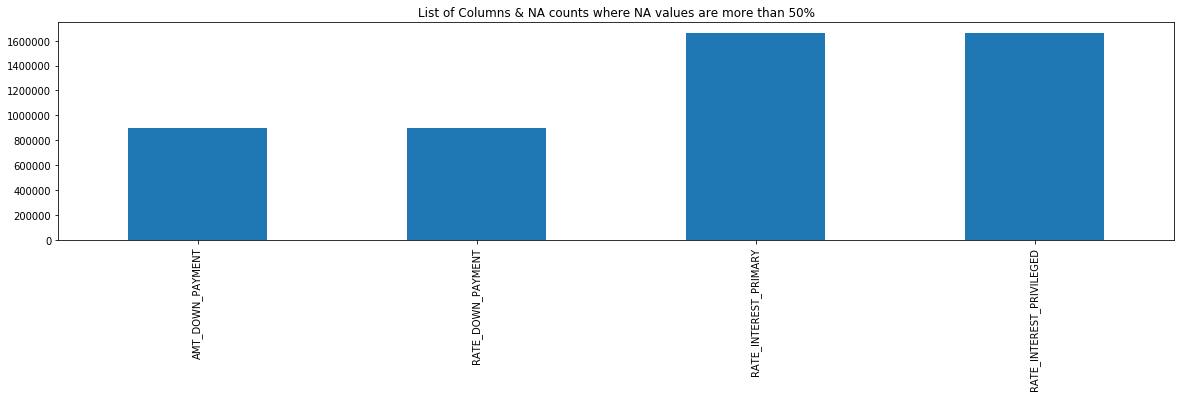

In [39]:
# Here I choose value 50% on which Data cleaning is done. 

# Plotting of Columns which has NA values more than 50%

total1_prev = df_prev.isnull().sum().sort_values()
Missing_Coll_prev = total1_prev[total1_prev.values > (0.5 * len(df_prev))]
plt.figure(figsize=(20,4))
Missing_Coll_prev.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

In [40]:
#removing columns with 50% null values
df_Clean_prev = df_prev.loc[:,round(df_prev.isnull().sum()/len(df_prev)*100,2)<50]
df_Clean_prev.shape

(1670214, 33)

In [41]:
#Figuring outt rows with more than 50% null value

NA_row_prev=df_app.transpose().isnull().sum()/len(df_app)*100
NA_row_prev[NA_row_prev.values >(0.5*len(df_app))]

Series([], dtype: float64)

In [42]:
#get the type of the columns
column_list_prev = list(df_Clean_prev.columns)
for i in column_list_prev:
    print (i, df_Clean_prev[i].dtypes)

SK_ID_PREV int64
SK_ID_CURR int64
NAME_CONTRACT_TYPE object
AMT_ANNUITY float64
AMT_APPLICATION float64
AMT_CREDIT float64
AMT_GOODS_PRICE float64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
FLAG_LAST_APPL_PER_CONTRACT object
NFLAG_LAST_APPL_IN_DAY int64
NAME_CASH_LOAN_PURPOSE object
NAME_CONTRACT_STATUS object
DAYS_DECISION int64
NAME_PAYMENT_TYPE object
CODE_REJECT_REASON object
NAME_TYPE_SUITE object
NAME_CLIENT_TYPE object
NAME_GOODS_CATEGORY object
NAME_PORTFOLIO object
NAME_PRODUCT_TYPE object
CHANNEL_TYPE object
SELLERPLACE_AREA int64
NAME_SELLER_INDUSTRY object
CNT_PAYMENT float64
NAME_YIELD_GROUP object
PRODUCT_COMBINATION object
DAYS_FIRST_DRAWING float64
DAYS_FIRST_DUE float64
DAYS_LAST_DUE_1ST_VERSION float64
DAYS_LAST_DUE float64
DAYS_TERMINATION float64
NFLAG_INSURED_ON_APPROVAL float64


In [43]:
df_Clean_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [44]:
def plot_graph_prev (name,r):
    plt.figure(figsize=(8,6))
    sns.countplot(x=name, data=df_Clean_prev)
    plt.xlabel(name, fontsize=16)
    plt.ylabel('Number of Contract', fontsize=16)
    plt.title(name, fontsize=18)
    plt.xticks(rotation=r, fontsize=12)

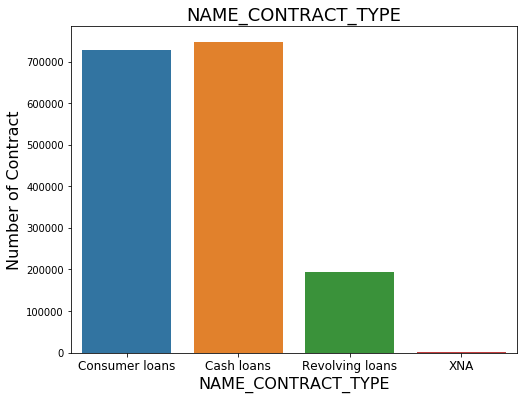

In [45]:
plot_graph_prev ('NAME_CONTRACT_TYPE',0)

#### Report 18 : There are three types of contract in the previous application data: Cash loans, Consumer loans, Revolving loans. Cash loans and Consumer loans are almost the same number whilst Revolving loans are.

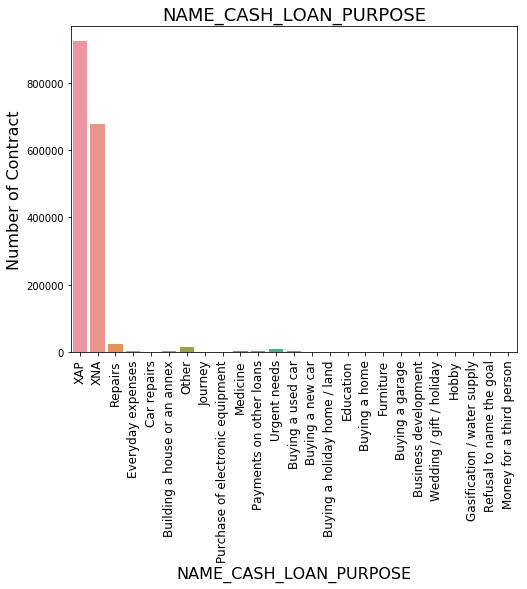

In [46]:
plot_graph_prev ('NAME_CASH_LOAN_PURPOSE',90)

#### Report 19 : Besides not identifed/not available categories, Repairs, Other, Urgent needs, medicine, building a house or an annex accounts for the largest number of contracts.

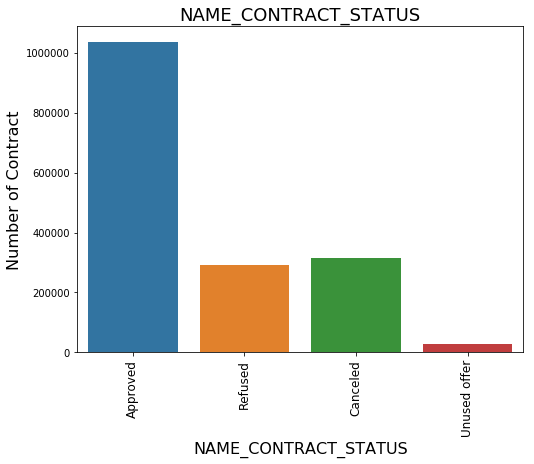

In [47]:
plot_graph_prev ('NAME_CONTRACT_STATUS',90)

#### Report 20 : Most previous applications contract statuses are Approved, Canceled and Refused. There is status of Unused offer is very rare.

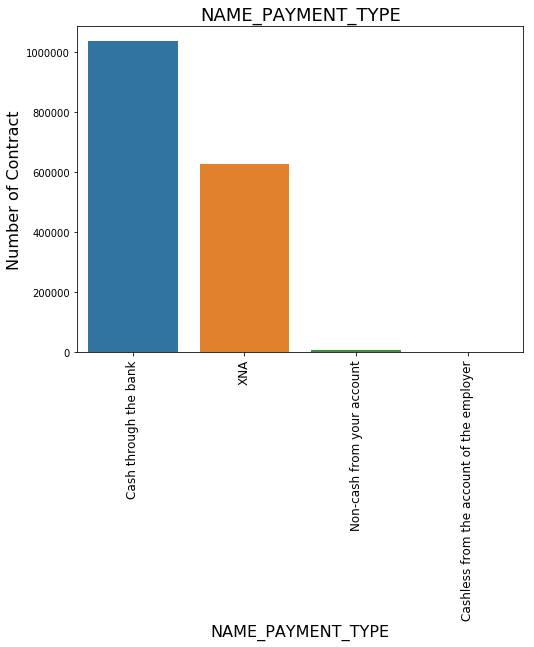

In [48]:
plot_graph_prev ('NAME_PAYMENT_TYPE',90)

#### Report 21 : Most of the previous applications were paid with Cash through the bank. Payments using Non-cash from your account or Cashless from the account of the employer are much rare.

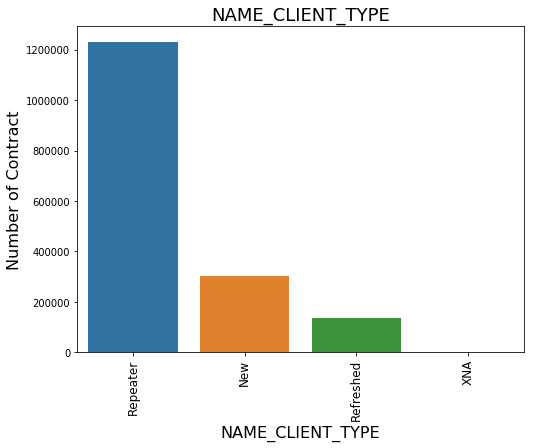

In [49]:
plot_graph_prev ('NAME_CLIENT_TYPE',90)

#### Report 22 : Maximum loan amount in previous application is about 40 times to that of mean value

In [52]:
col_numeric_prev = df_Clean_prev.select_dtypes(exclude=[object])

##### Replace some numeric column values with the median
##### Median: as these columns may contain outlier so choosing the median is the better option

In [53]:
col_numeric_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [54]:
col_median_prev =  col_numeric_prev.columns

for c in col_median_prev:
    df_Clean_prev[c] = df_Clean_prev[c].fillna(df_Clean_prev[c].median())

C:\Users\ph\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Analysis on Outliers

In [51]:
# For checking AMT_APPLICATION

val_prev = pd.DataFrame(df_Clean_prev['AMT_APPLICATION'].describe())
val_prev.loc['count'] = val_prev.loc['count'].astype(int)
val_prev.iloc[1:] = val_prev.iloc[1:].applymap('{:.4f}'.format)
print(val_prev)

      AMT_APPLICATION
count     1.67021e+06
mean      175233.8604
std       292779.7624
min            0.0000
25%        18720.0000
50%        71046.0000
75%       180360.0000
max      6905160.0000


#### Report 23 : Maximum loan amount in previous application is about 40 times to that of mean value

In [74]:
#Removing outliers,Remove Outliers (values from 99 to 100%)

q_prev = df_Clean_prev['AMT_APPLICATION'].quantile(0.995)
df_Clean_prev = df_Clean_prev[df_Clean_prev['AMT_APPLICATION'] < q_prev]
val1_prev = pd.DataFrame(df_Clean_prev['AMT_APPLICATION'].describe())
val1_prev.loc['count'] = val1_prev.loc['count'].astype(int)
val1_prev.iloc[1:] = val1_prev.iloc[1:].applymap('{:.4f}'.format)
print(val1_prev)

      AMT_APPLICATION
count     1.62331e+06
mean      140394.0709
std       199200.3486
min            0.0000
25%        16870.5000
50%        67500.0000
75%       170550.0000
max      1126687.5000


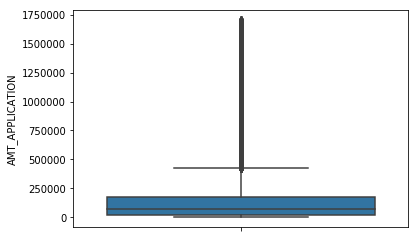

In [56]:
sns.boxplot(y=df_Clean_prev['AMT_APPLICATION'])
plt.show()

In [58]:
bins = [0, 18500, 70000, 180000, 1705500]
slot = ['0-18500', '18500-70000', '70000-180000', '180000-1705500']
df_Clean_prev['AMT_APPLICATION_RANGE']= pd.cut(df_Clean_prev['AMT_APPLICATION'], bins, labels=slot)

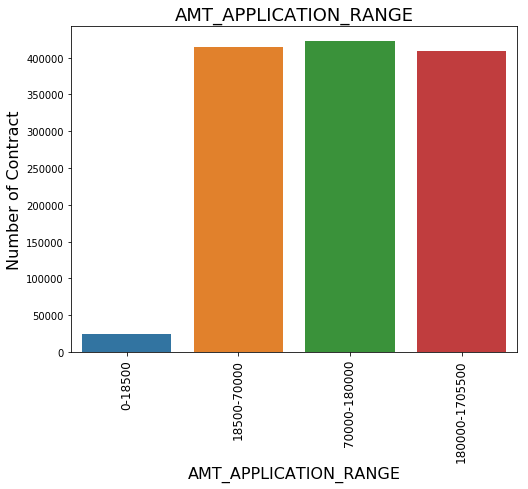

In [59]:
plot_graph_prev('AMT_APPLICATION_RANGE',90)

#### Report 24 : Most of the loan amount lies above 18500

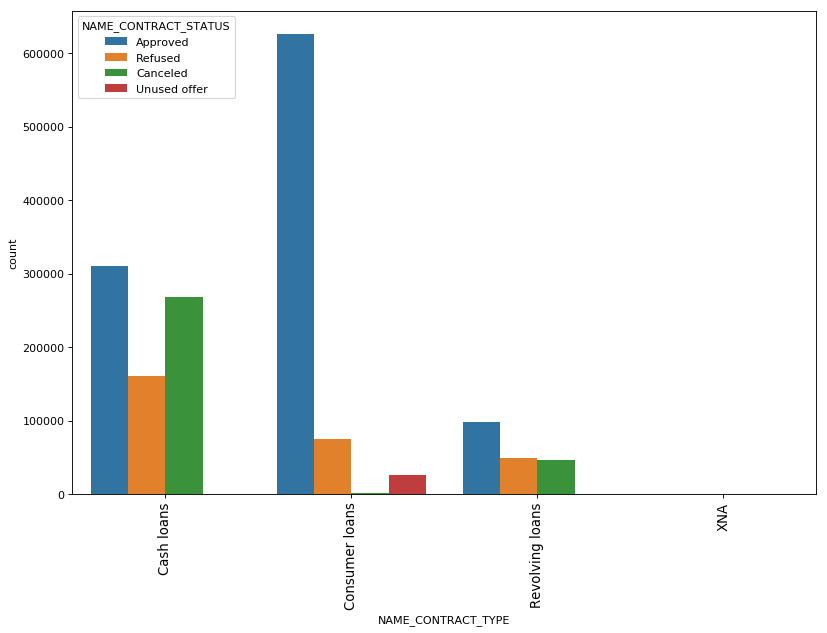

In [60]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =df_Clean_prev, x= 'NAME_CONTRACT_TYPE', order=df_Clean_prev['NAME_CONTRACT_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

#### Report 25 : Most of the Consumer loans are getting approved followed by cash loans.

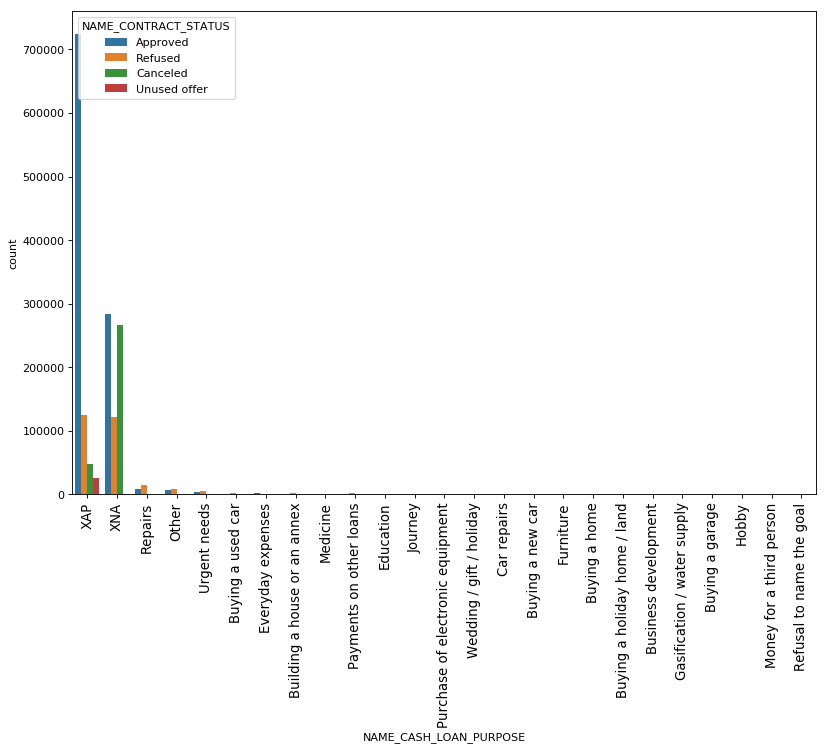

In [61]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =df_Clean_prev, x= 'NAME_CASH_LOAN_PURPOSE', order=df_Clean_prev['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

#### Report 26 : Most of the loans are getting approved without proper reasons.

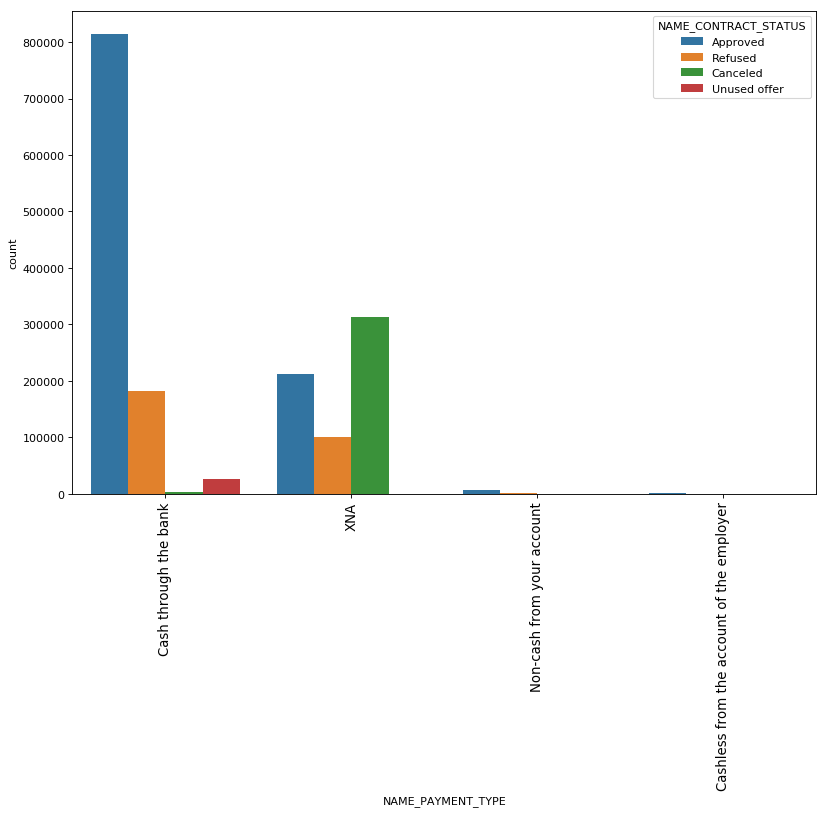

In [62]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =df_Clean_prev, x= 'NAME_PAYMENT_TYPE', order=df_Clean_prev['NAME_PAYMENT_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

#### Report 27 : Most of the loans are approved where the loan amount is paid through cash from bank.

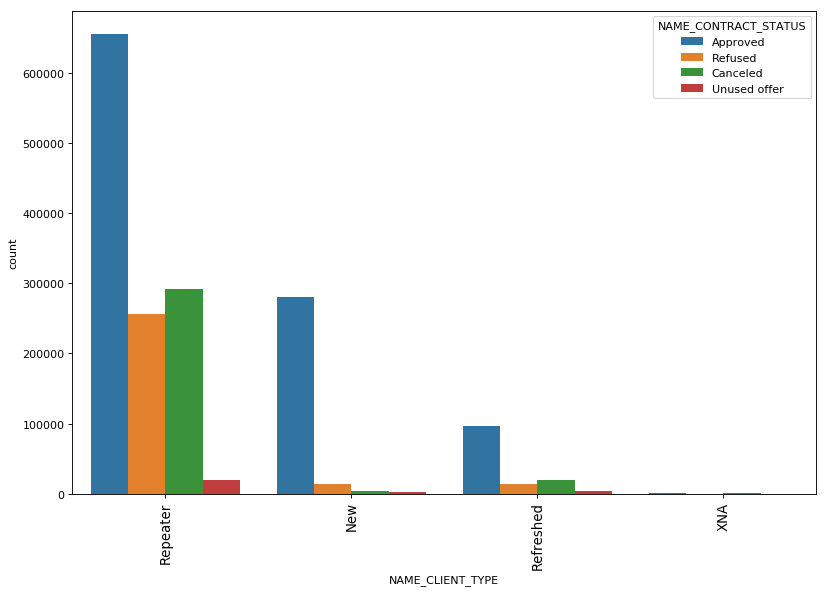

In [63]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =df_Clean_prev, x= 'NAME_CLIENT_TYPE', order=df_Clean_prev['NAME_CLIENT_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

#### Report 28 : Most of loans are approved for existing Customers followed by New. From this we can also conclude the ratio of existing Customer to New Customer is low.

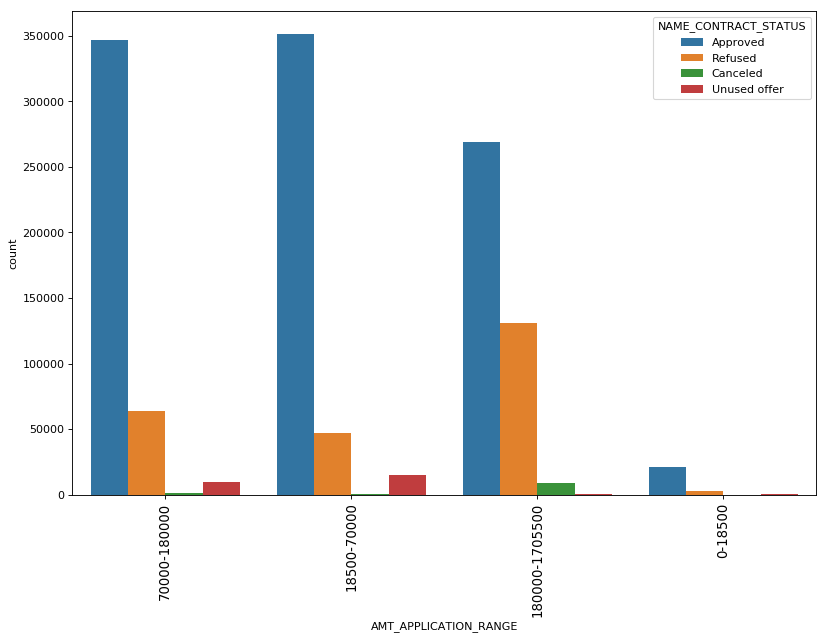

In [64]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =df_Clean_prev, x= 'AMT_APPLICATION_RANGE', order=df_Clean_prev['AMT_APPLICATION_RANGE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

#### Report 29 : Loan with range in between 70000-180000 and 18500-70000 has more approve rate compare to that of 180000-1705500 range.

# Bivariate analysis for numeric columns

In [79]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df3 = df_Clean.select_dtypes(include=numerics)
df3_clean = df3.iloc[:, 0:10]
df4=df3_clean.drop(columns=['SK_ID_CURR'])
df4.head(10)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038
5,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588
6,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130
7,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449
8,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243
9,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019


In [80]:
df_corr=df4.corr()
df_corr.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,0.017560,-0.021392,-0.029624,-0.011422,-0.038840,-0.036651,0.078441,-0.045207
CNT_CHILDREN,0.017560,1.000000,0.030098,0.000149,0.018934,-0.003857,-0.023770,0.343472,-0.247237
AMT_INCOME_TOTAL,-0.021392,0.030098,1.000000,0.400653,0.474102,0.405113,0.185798,0.073427,-0.171048
AMT_CREDIT,-0.029624,0.000149,0.400653,1.000000,0.771860,0.986634,0.094455,-0.056275,-0.065840
AMT_ANNUITY,-0.011422,0.018934,0.474102,0.771860,1.000000,0.775688,0.112143,0.009444,-0.104240


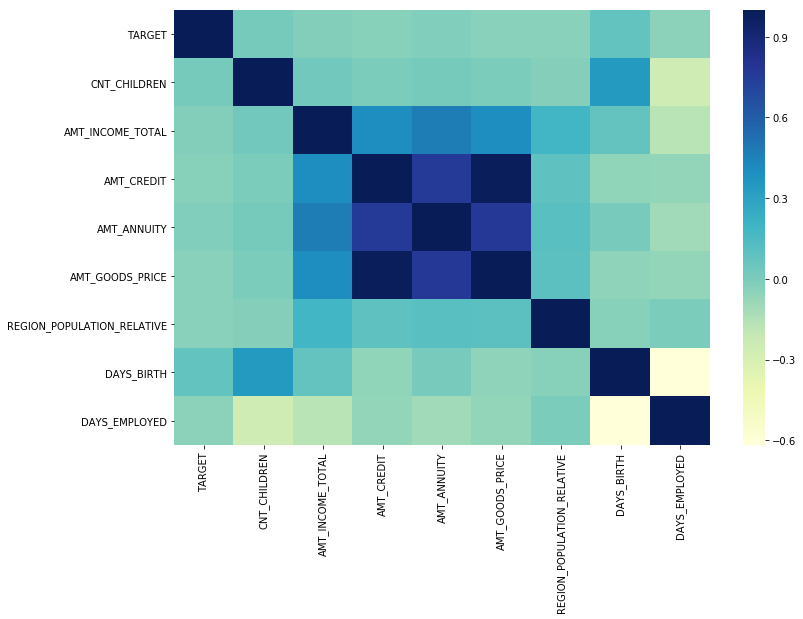

In [81]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(df_corr, cmap="YlGnBu")
plt.show()

#### Report 30 : Amount credit,Amount annuity and Amount Goods Price are highly interrelated.

In [82]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df2_prev = df_Clean_prev.select_dtypes(include=numerics)
df3_prev=df2_prev.drop(columns=['SK_ID_CURR','SK_ID_PREV'])
df3_prev.head(10)

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,17145.0,15,1,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,679671.0,607500.0,11,1,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,112500.0,11,1,-301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,450000.0,7,1,-512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,404055.0,337500.0,9,1,-781,-1,24.0,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
5,23703.930,315000.0,340573.5,315000.0,8,1,-684,-1,18.0,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,11250.000,0.0,0.0,112320.0,11,1,-14,-1,12.0,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
7,11250.000,0.0,0.0,112320.0,7,1,-21,-1,12.0,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
8,11250.000,0.0,0.0,112320.0,15,1,-386,-1,12.0,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
9,11250.000,0.0,0.0,112320.0,15,1,-57,-1,12.0,365243.0,-831.0,-361.0,-537.0,-499.0,0.0


In [84]:
df_prev_corr = df3_prev.corr()
df_prev_corr.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY,1.000000,0.774084,0.789936,0.801230,-0.033447,0.015406,0.195318,-0.011196,0.354060,0.038529,-0.043607,-0.051676,0.053585,0.040156,0.207007
AMT_APPLICATION,0.774084,1.000000,0.951980,0.971351,-0.020688,-0.001326,0.113231,-0.005049,0.655987,0.037460,-0.021983,-0.040249,0.135965,0.117000,0.198245
AMT_CREDIT,0.789936,0.951980,1.000000,0.942129,-0.029181,-0.044314,0.111242,-0.007639,0.634508,-0.065722,0.026949,0.078390,0.180717,0.174070,0.197263
AMT_GOODS_PRICE,0.801230,0.971351,0.942129,1.000000,-0.040709,-0.013443,0.208958,-0.011328,0.655594,0.006378,-0.022362,-0.011332,0.118146,0.107143,0.142277
HOUR_APPR_PROCESS_START,-0.033447,-0.020688,-0.029181,-0.040709,1.000000,0.006062,-0.040412,0.015848,-0.044878,0.003422,0.003848,-0.003333,0.002290,0.002693,-0.063078


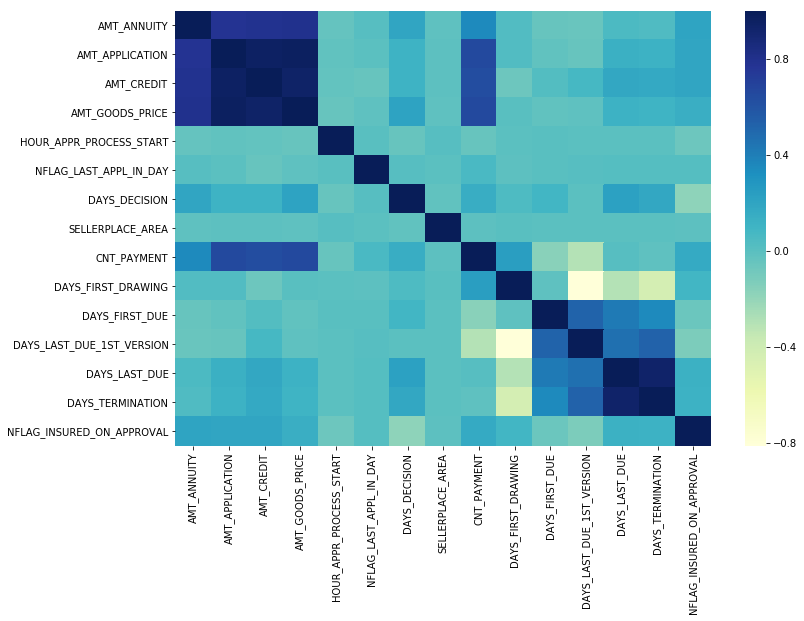

In [85]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(df_prev_corr, cmap="YlGnBu")
plt.show()